In [ ]:
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# name = "5b_40A"
# dataset = pd.read_csv(f"{name}.csv")
# X = dataset.iloc[:, 0].values
# y = dataset.iloc[:, 1].values


In [ ]:
name = "5b_45A"
dataset = pd.read_csv(f"{name}.csv")
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)
dataset.head(5)
len(X)

7095

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1).ravel())

SVR()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))

In [ ]:
real_values = sc_y.inverse_transform(y_test.reshape(-1,1))
df = pd.DataFrame(data = real_values)
df.head()

,0
0,30.247833
1,20.056679
2,37.294288
3,30.597244
4,37.003112


In [ ]:
df2 = df.assign(PredictedValues=y_pred)
df3 = df2.set_axis(['Real Values','Predicted Values'],axis=1,inplace=False)
df3
df3.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<ipython-input-86-765da8ee90b2>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df3 = df2.set_axis(['Real Values','Predicted Values'],axis=1,inplace=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sklearn as sl

In [ ]:
sl.metrics.r2_score(real_values,y_pred)

0.9698607962008382

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [ ]:
z = rmse(y_pred,real_values)
print(sum(z)/len(z))

0.9857276433249602


In [ ]:
z = mse(y_pred,real_values)
print(sum(z)/len(z))

0.97165898681498


In [ ]:
mae = meanabs(y_pred,real_values, axis=0)
print(sum(mae)/len(mae))


0.6171086008153823


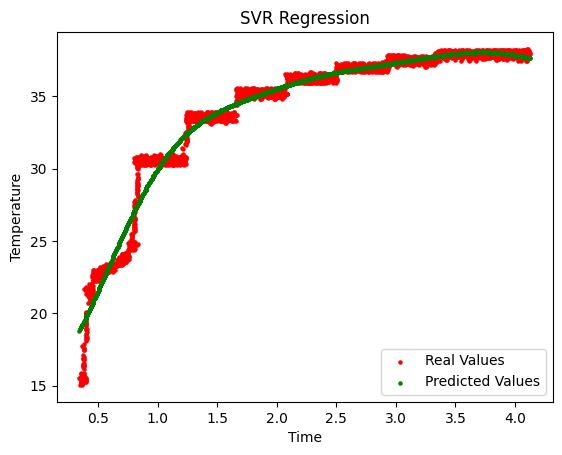

<Figure size 640x480 with 0 Axes>

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), real_values,5,color='red',label="Real Values")
plt.scatter(sc_X.inverse_transform(X_test), y_pred, 5,color = 'green',label="Predicted Values")
plt.title('SVR Regression')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend(loc ="lower right")
plt.show()
path = "myfile.eps"
plt.savefig(path, dpi=100,bbox_inches="tight")

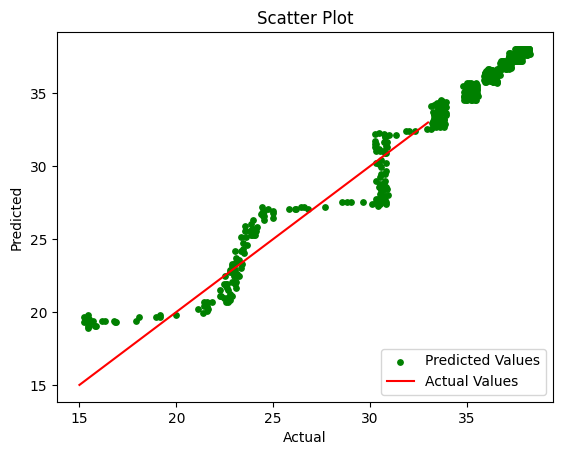

<Figure size 640x480 with 0 Axes>

In [ ]:
real = real_values[0::4]
pred = y_pred[0::4]
a =  np.transpose(real)
b = np.transpose(pred)

plt.scatter(a,b, 15,c ="green",label="Predicted Values")
x = np.linspace(15,33,100)
y = x
plt.plot(x, y, '-r', label='Actual Values')
plt.legend(loc ="lower right")
plt.title('Scatter Plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig(f"{name}_predicted&actual.eps")
plt.show()
path = f"{name}_predicted&actual.eps"
plt.savefig(path, dpi=100,bbox_inches="tight")

In [ ]:

len(pred)

621